In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA,TruncatedSVD,NMF
from sklearn.preprocessing import Normalizer
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from scipy.interpolate import interp1d
import scipy
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None

In [2]:
heads=pd.read_csv("/data/dharp/compounding/datasets/heads_reduced.csv",sep="\t")
heads=heads.query('decade != 2000')
heads.columns=['constituent','decade','context','count']
heads['constituent']=heads['constituent'].str.replace(r'_n$', r'_h', regex=True)
heads=heads.groupby(['constituent','context'])['count'].sum()

In [3]:
modifiers=pd.read_csv("/data/dharp/compounding/datasets/modifiers_reduced.csv",sep="\t")
modifiers=modifiers.query('decade != 2000')
modifiers.columns=['constituent','decade','context','count']
modifiers['constituent']=modifiers['constituent'].str.replace(r'_n$', r'_m', regex=True)
modifiers=modifiers.groupby(['constituent','context'])['count'].sum()

In [4]:
constituents = pd.concat([heads,modifiers])
constituents.shape

(7074247,)

In [5]:
constituents=constituents.to_sparse()

In [7]:
constituents, rows, columns = constituents.to_coo(row_levels=['constituent'],column_levels=['context'],sort_labels=True)

In [9]:
len(rows)

107866

In [10]:
co_occ_counts_svd = TruncatedSVD(n_components=300, n_iter=10, random_state=1991)
display(co_occ_counts_svd.fit(constituents).explained_variance_ratio_.sum())
co_occ_list=co_occ_counts_svd.fit(constituents).explained_variance_ratio_
co_occ_reduced = co_occ_counts_svd.fit_transform(constituents)
co_occ_reduced = Normalizer(copy=False).fit_transform(co_occ_reduced)
co_occ_reduced=pd.DataFrame(co_occ_reduced,index=rows)
co_occ_reduced

0.9859874533097172

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
a_h,0.424,0.005,0.013,-0.002,-0.001,-0.039,0.190,-0.014,0.001,-0.095,...,-0.004,0.016,-0.008,-0.009,0.048,0.007,0.042,-0.007,0.017,-0.073
a_m,0.320,0.031,0.005,0.116,-0.017,-0.020,0.112,0.047,-0.004,-0.088,...,0.033,0.024,0.057,0.016,0.016,-0.041,-0.043,-0.013,-0.011,0.075
aa_h,0.011,0.002,0.000,0.001,0.000,-0.007,0.049,-0.001,-0.016,0.045,...,0.033,-0.003,0.047,-0.012,0.013,-0.013,-0.031,-0.047,-0.008,-0.035
aa_m,0.184,0.011,0.006,-0.002,0.035,-0.010,0.050,0.001,-0.005,-0.042,...,0.037,-0.014,0.029,0.023,0.000,-0.027,-0.022,-0.006,-0.013,-0.042
aaa_h,0.302,-0.015,0.022,0.003,-0.000,-0.024,0.154,0.101,-0.006,-0.074,...,0.037,-0.006,0.046,0.009,-0.003,0.020,-0.003,-0.039,-0.021,-0.027
aaa_m,0.062,0.045,-0.002,0.087,-0.012,-0.003,0.004,-0.005,-0.001,-0.005,...,0.030,-0.010,0.033,0.002,0.023,-0.010,-0.008,-0.049,-0.034,-0.041
aaaa_m,0.001,0.000,0.000,0.000,-0.000,-0.001,0.005,0.001,0.000,-0.005,...,0.032,-0.006,0.032,0.009,0.033,-0.024,-0.008,-0.032,-0.027,-0.039
aaaaa_h,0.001,0.000,0.000,0.000,-0.000,-0.001,0.005,0.001,0.000,-0.005,...,0.032,-0.006,0.032,0.009,0.033,-0.024,-0.008,-0.032,-0.027,-0.039
aaaaa_m,0.001,0.000,0.000,0.000,-0.000,-0.001,0.005,0.001,0.000,-0.005,...,0.032,-0.006,0.032,0.009,0.033,-0.024,-0.008,-0.032,-0.027,-0.039
aaai_h,0.001,0.001,0.001,0.002,0.005,0.002,0.004,0.031,0.001,-0.005,...,0.015,0.072,-0.113,0.009,-0.064,-0.067,-0.069,0.032,-0.002,-0.045


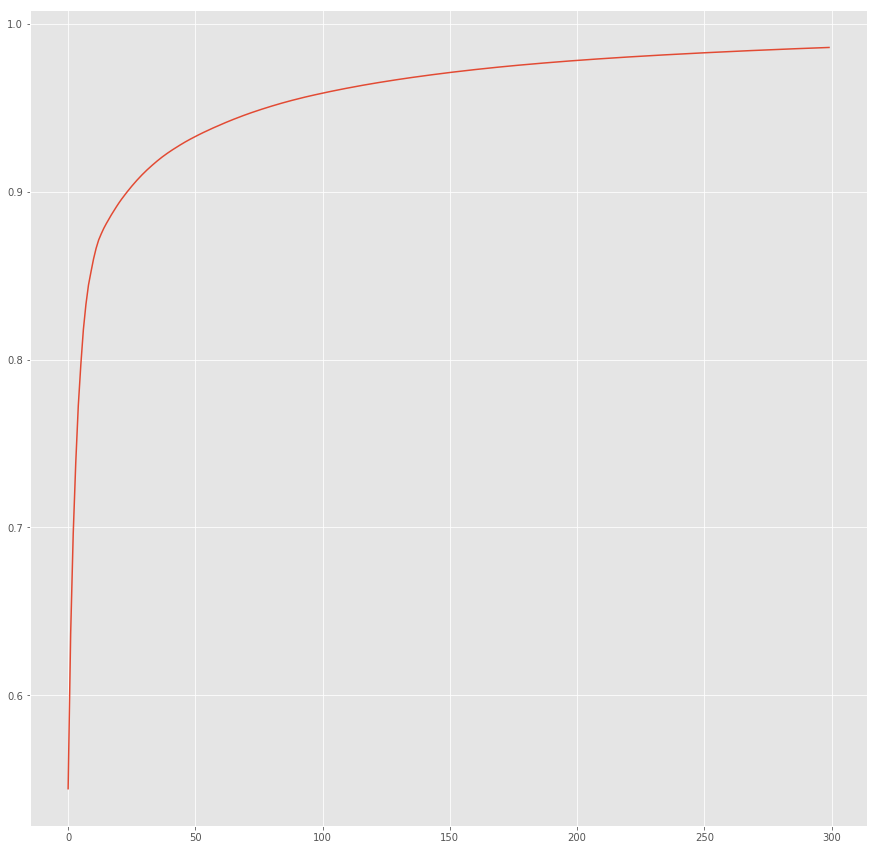

In [11]:
pd.Series(co_occ_list).cumsum().plot(figsize=[15,15])

In [ ]:
co_occ_reduced.to_csv("/data/dharp/compounding/datasets/constituents_dec_agnostic_dim_reduced.csv",sep="\t",header=False)

In [ ]:
constituents.mean()